### Figure 4 supplementary

In [18]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.extend(['/home/nkinsky/Documents/GitHub/NeuroPy'])
sys.path.extend(['/home/nkinsky/Documents/GitHubPrivate/pythonprogs/DataPaths/'])

import matplotlib.pyplot as plt
import numpy as np
import subjects
import pandas as pd
import seaborn as sns
from neuropy import plotting
from neuropy.utils.misc import flatten
from scipy import stats
from plotters import Plotter, get_nsd_vs_sd_df, get_nsd_vs_sd_df_by_state, stats_to_df, filter_stats_df, add_parametric_extras
from stats_utils import get_bootstrap_prob, get_bootstrap_prob_paired

grpdata = subjects.GroupData()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### EDF 7A: Ripple bias

,comp1,comp2,test,pval,test_stat
0,MAZE_NSD,MAZE_SD,Welch's,4.463e-01,8.036e-01
1,PRE_NSD,PRE_SD,Welch's,4.330e-01,-8.265e-01
2,ZT 0-2.5_NSD,ZT 0-2.5_SD,Welch's,8.369e-01,-2.114e-01
3,ZT 2.5-5_NSD,ZT 2.5-5_SD,Welch's,6.375e-01,-4.845e-01
4,ZT 5-7.5_NSD,ZT 5-7.5_SD,Welch's,4.659e-01,7.595e-01
5,ZT 0-2.5_NSD,ZT 5-7.5_SD,Welch's,6.385e-01,4.853e-01
6,ZT 0-2.5_NSD,ZT 2.5-5_NSD,t-test,6.771e-01,-4.417e-01
7,PRE_NSD,MAZE_NSD,t-test,6.835e-01,-4.324e-01
8,MAZE_NSD,ZT 0-2.5_NSD,t-test,9.858e-01,1.873e-02
9,ZT 2.5-5_NSD,ZT 5-7.5_NSD,t-test,3.963e-01,-9.274e-01


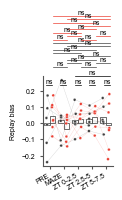

In [19]:
replay_df = grpdata.continuous_replay_bias_blocks

fig = subjects.SdFig().fig_supp()

ax = fig.subplot(fig.gs[0])

results_list = []
p1 = Plotter(data=replay_df, x="zt", y="replay_bias", hue="grp", hue_order=["NSD", "SD"])
p1.stripbarlineplot_sd(palette=subjects.colors_sd(1))
results_list.append(p1.stat_anot_sd(
    stat_within="t-test_paired",
    stat_across="t-test_welch",
    alpha_within=0.05,
    alpha_across=0.05,
    fontsize=5,
))
ax.set_ylabel("Replay bias")
ax.set_xlabel("")
fig.savefig(subjects.figpath_sd / "replay_bias", format="svg")
# pd.DataFrame(flatten(flatten(results_list)), columns=["comp1", "comp2", "test", "pval", "test_stat"])

In [26]:
results_df = stats_to_df(results_list)
results_df = add_parametric_extras(replay_df, results_df, "replay_bias")
results_df.to_csv("/home/nkinsky/Documents/sleep_deprivation/replay_bias.csv")
results_df

,comp1,comp2,test,pval,test_stat,CI95%,Cohen's-d,dof
0,MAZE_NSD,MAZE_SD,Welch's,4.463e-01,8.036e-01,"[-0.1, 0.2]",0.467597,7.525365
1,PRE_NSD,PRE_SD,Welch's,4.330e-01,-8.265e-01,"[-0.22, 0.1]",0.479062,7.829159
2,ZT 0-2.5_NSD,ZT 0-2.5_SD,Welch's,8.369e-01,-2.114e-01,"[-0.1, 0.08]",0.119091,9.989659
3,ZT 2.5-5_NSD,ZT 2.5-5_SD,Welch's,6.375e-01,-4.845e-01,"[-0.09, 0.06]",0.266366,10.993081
4,ZT 5-7.5_NSD,ZT 5-7.5_SD,Welch's,4.659e-01,7.595e-01,"[-0.1, 0.19]",0.403903,9.528734
5,ZT 0-2.5_NSD,ZT 5-7.5_SD,Welch's,6.385e-01,4.853e-01,"[-0.11, 0.18]",0.258084,9.535044
6,ZT 0-2.5_NSD,ZT 2.5-5_NSD,t-test,6.771e-01,-4.417e-01,"[-0.03, 0.02]",0.073878,5.000000
7,PRE_NSD,MAZE_NSD,t-test,6.835e-01,-4.324e-01,"[-0.22, 0.16]",0.221261,5.000000
8,MAZE_NSD,ZT 0-2.5_NSD,t-test,9.858e-01,1.873e-02,"[-0.17, 0.17]",0.010822,5.000000
9,ZT 2.5-5_NSD,ZT 5-7.5_NSD,t-test,3.963e-01,-9.274e-01,"[-0.05, 0.02]",0.181664,5.000000


### EDF 6D: (1h blocks) proportion of replays

In [ ]:
boot_df = subjects.GroupData().continuous_replay_proportion_1h_blocks_bootstrap
replay_df = grpdata.replay_continuous_events_1h_blocks

fig = subjects.SdFig().fig4(8, 6)

ax = fig.subplot(fig.gs[3, 0])

p1 = Plotter(data=boot_df, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"])
p1.boxplot_sd2(palette=subjects.colors_sd(1), zorder=3).stat_anot_sd(
    stat_within=get_bootstrap_prob_paired,
    stat_across=get_bootstrap_prob,
    alpha_across=0.025,
    alpha_within=0.025,
    fontsize=5,
    verbose=True,
)

palette_light = subjects.colors_sd_light()
p2 = Plotter(data=replay_df, x="zt", y="prop", hue="grp", hue_order=["NSD", "SD"])
p2.striplineplot_sd(palette=palette_light)

# fig.savefig(subjects.figpath_sd / "replay_proportion_bootstrap", format="svg")

### EDF 7B: Total number of candidate events

p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 5.00e-02 < p <= 1.00e-01
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

MAZE_NSD vs. MAZE_SD: get_bootstrap_prob, P_val:2.728e-01 Stat=8.963e-01
PRE_NSD vs. PRE_SD: get_bootstrap_prob, P_val:3.572e-01 Stat=5.793e-01
ZT 0-2.5_NSD vs. ZT 0-2.5_SD: get_bootstrap_prob, P_val:1.479e-01 Stat=1.529e+00
ZT 2.5-5_NSD vs. ZT 2.5-5_SD: get_bootstrap_prob, P_val:4.173e-02 Stat=2.282e+00
ZT 5-7.5_NSD vs. ZT 5-7.5_SD: get_bootstrap_prob, P_val:2.917e-01 Stat=8.361e-01
ZT 0-2.5_NSD vs. ZT 5-7.5_SD: get_bootstrap_prob, P_val:1.625e-03 Stat=4.140e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       #: 2.50e-02 < p <= 5.00e-02
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

ZT 0-2.5_NSD vs. ZT 2.5-5_NSD: get_bootstrap_prob_paired, P_val:1.400e-03 Stat=7.845e+02
PRE_NSD vs. MAZE_NSD: get_bootstrap_prob_paired, P_val:1.00

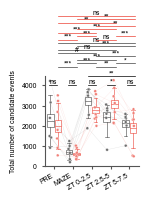

In [33]:
jump_thresh = 40
assert jump_thresh in [20, 40]
save_append = "" if jump_thresh == 40 else f"_jumpthresh{jump_thresh}"
prop_append = "" if jump_thresh == 40 else f"{jump_thresh}jd"

boot_df = getattr(subjects.GroupData(), f"candidate_replay_number_bootstrap{save_append}")
replay_df = getattr(grpdata, f"candidate_replay_number{save_append}")

fig = subjects.SdFig().fig4(8, 6)

ax = fig.subplot(fig.gs[3, 0])

results_list = []
p1 = Plotter(data=boot_df, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"])
results_list.append(p1.boxplot_sd2(palette=subjects.colors_sd(1)).stat_anot_sd(
    stat_within=get_bootstrap_prob_paired,
    stat_across=get_bootstrap_prob,
    alpha_across=[0.05, 0.01, 0.001],
    alpha_within=[0.025, 0.005, 0.0005],
    fontsize=5,
    verbose=True,
))
palette_light = subjects.colors_sd_light()
p2 = Plotter(data=replay_df, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"])
p2.striplineplot_sd(palette=palette_light)

ax.set_xlabel("")
ax.set_ylabel("Total number of candidate events")

fig.savefig(subjects.figpath_sd / f"candidate_replay_number{save_append}", format="svg")

In [38]:
results_df = stats_to_df(results_list)
results_df = filter_stats_df(results_df, figure="EDF7B")
results_df.to_csv("/home/nkinsky/Documents/sleep_deprivation/ProcessedData/cand_number.csv")
results_df

,comp1,comp2,test,pval,test_stat
0,MAZE_NSD,MAZE_SD,"get_bootstrap_prob,",2.728e-01,8.963e-01
1,PRE_NSD,PRE_SD,"get_bootstrap_prob,",3.572e-01,5.793e-01
3,ZT 2.5-5_NSD,ZT 2.5-5_SD,"get_bootstrap_prob,",4.173e-02,2.282e+00
4,ZT 5-7.5_NSD,ZT 5-7.5_SD,"get_bootstrap_prob,",2.917e-01,8.361e-01
5,ZT 0-2.5_NSD,ZT 5-7.5_SD,"get_bootstrap_prob,",1.625e-03,4.140e+00
6,ZT 0-2.5_NSD,ZT 2.5-5_NSD,"get_bootstrap_prob_paired,",1.400e-03,7.845e+02
7,PRE_NSD,MAZE_NSD,"get_bootstrap_prob_paired,",1.000e-04,1.541e+03
8,MAZE_NSD,ZT 0-2.5_NSD,"get_bootstrap_prob_paired,",0.000e+00,-2.479e+03
9,ZT 2.5-5_NSD,ZT 5-7.5_NSD,"get_bootstrap_prob_paired,",1.420e-02,3.106e+02
12,PRE_NSD,ZT 0-2.5_NSD,"get_bootstrap_prob_paired,",2.860e-02,-9.380e+02


### EDF 7C: Replay proportion by brainstate

In [ ]:
# Function to reorder zt epochs - works but does NOT fix the issue where seaborn doesn't plot epochs in the correct order.
# Use next code block, which employs the pd.Categorical method, to do fix the order AND plot properly!!!

# df_test = replay_df[replay_df.brainstate == "NREM"]
# def reorder_zt(df):
#     """Reorder dataframe zt times to plot correctly."""
#     zt_order = ["PRE", "MAZE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]
#     df = df.reset_index()
#     ind_reorder_all = []
#     nrows = 0
#     for ids in df.session.unique():
#         df_sesh = df[df.session == ids]
#         ind_reorder = np.argsort(np.array([zt_order.index(zt_str) for zt_str in df_sesh.zt.values])) + nrows
#         ind_reorder_all.append(ind_reorder)
#         nrows += df_sesh.shape[0]
        
    
    
#     ind_reorder_all = np.concatenate(ind_reorder_all)
#     df_reorder = df.loc[ind_reorder_all].reset_index().drop(columns=["level_0", "index"])
    
#     return df_reorder

# reorder_zt(df_test).head(5)

In [8]:
# alternative method to use for ordering ZT epochs properly - better for plotting!!!
replay_df = getattr(grpdata, "replay_continuous_events_brainstate")
zt_order = ["PRE", "MAZE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]
df_test = replay_df[replay_df.brainstate == "NREM"]
df_test["zt"] = pd.Categorical(df_test["zt"], categories=zt_order)
df_test.sort_values(by="zt", inplace=True)
df_test.head(10)

/tmp/ipykernel_3494375/3997323503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["zt"] = pd.Categorical(df_test["zt"], categories=zt_order)
/tmp/ipykernel_3494375/3997323503.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.sort_values(by="zt", inplace=True)


,grp,brainstate,session,zt,prop
56,SD,NREM,7,PRE,0.246291
22,NSD,NREM,5,PRE,0.227715
62,SD,NREM,11,PRE,0.147852
3,NSD,NREM,0,PRE,0.166667
18,NSD,NREM,4,PRE,0.231283
7,NSD,NREM,1,PRE,0.204030
11,NSD,NREM,2,PRE,0.189189
60,SD,NREM,10,PRE,0.071429
19,NSD,NREM,5,ZT 0-2.5,0.285367
15,NSD,NREM,4,ZT 0-2.5,0.224806


#Sessions = 13

NSD WAKE stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 2.50e-02 < p <= 1.00e-01
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

PRE vs. MAZE: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=-2.907e-01
MAZE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=2.831e-01
ZT 0-2.5 vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:4.074e-01 Stat=7.392e-03
ZT 2.5-5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:3.415e-01 Stat=-9.664e-03
PRE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:4.195e-01 Stat=-7.650e-03
MAZE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:3.000e-04 Stat=2.905e-01
ZT 0-2.5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:4.781e-01 Stat=-2.272e-03
PRE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:4.575e-01 Stat=-2.577e-04
MAZE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:1.300e-03 Stat=2.808e-01
PRE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:3.653e-01 Stat=-9.922e

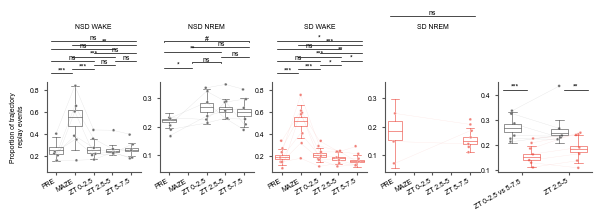

In [45]:
sessions = subjects.pf_sess()
match_ylims = True

zt_order = ["PRE", "MAZE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]

jump_thresh = 40
assert jump_thresh in [20, 40]
save_append = "" if jump_thresh == 40 else f"_jumpthresh{jump_thresh}"
prop_append = "" if jump_thresh == 40 else f"{jump_thresh}jd"
fig = subjects.SdFig().fig4(8, 6)
ax_array = []
results_list = []
for g, grp in enumerate(["NSD", "SD"]):
    for ids, st in enumerate(["WAKE", "NREM"]): # enumerate(["WAKE", "NREM"]):
    
        ax = fig.subplot(fig.gs[0, 2 * g + ids])
        ax_array.append(ax)
        boot_df = getattr(subjects.GroupData(), f"continuous_replay_{st}_proportion_bootstrap{save_append}")
        boot_df = boot_df[(boot_df.grp == grp)]
        replay_df = getattr(grpdata, f"replay_continuous_events{save_append}_brainstate")
        # replay_df = reorder_zt(replay_df[(replay_df.brainstate == st) & (replay_df.grp == grp)])
        replay_df = replay_df[(replay_df.brainstate == st) & (replay_df.grp == grp)]
        if (grp == "SD") and (st == "NREM"):  # exlude the few tiny bits of NREM that a couple NSD rats have during the 2nd SD epoch
            replay_df = replay_df[~((replay_df.brainstate == "NREM") & (replay_df.zt == "ZT 2.5-5"))]
            boot_df = boot_df[~(boot_df.zt == "ZT 2.5-5")]
        replay_df["zt"] = pd.Categorical(replay_df["zt"], categories=zt_order)
        replay_df.sort_values(by="zt", inplace=True)
    
        palette = [subjects.colors_sd()[g]]
    
        # p1 = Plotter(data=boot_df, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"])
        p1 = Plotter(data=boot_df, x="zt", y="is_cont", ax=ax)

        p1.boxplot_sd2(palette=palette, order=zt_order)

        try:
            print(f"\n\033[4m{grp} {st} stats\033[0m:")
            results_list.append(p1.stat_anot(
                stat_within=get_bootstrap_prob_paired,
                # stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
                prepend=(grp, st),
                ))

        except:
            results_list.append(p1.stat_anot(
                stat_within=get_bootstrap_prob,
            #     stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
                prepend=(grp, st),
            ))
            pass
        
        palette_light = [subjects.colors_sd_light()[g]]
        # p2 = Plotter(data=replay_df, x="zt", y="prop", hue="grp", hue_order=["NSD", "SD"])
        p2 = Plotter(data=replay_df, x="zt", y="prop", ax=ax)
        p2.striplineplot_sd(palette=palette_light)
        # p2.striplineplot_sd(palette=palette_light)

        ax.set_title(f"{grp} {st}")
        ax.set_xlabel("")
        if (g == 0) & (ids == 0):
            ax.set_ylabel("Proportion of trajectory\n replay events")
        else:
            ax.set_ylabel("")

# Compare between groups
boot_list = []
for st in ["WAKE", "NREM"]:
    boot_df_temp = getattr(subjects.GroupData(), f"continuous_replay_{st}_proportion_bootstrap{save_append}")
    boot_df_temp["brainstate"] = st
    boot_list.append(boot_df_temp)
boot_df = pd.concat(boot_list)
replay_df = getattr(grpdata, f"replay_continuous_events{save_append}_brainstate")
df1 = get_nsd_vs_sd_df_by_state(boot_df)
df2 = get_nsd_vs_sd_df_by_state(replay_df)

ax = fig.subplot(fig.gs[0, 4])
ax_array.append(ax)
ax_array = np.array(ax_array)
palette = subjects.colors_sd(1)
palette_light = subjects.colors_sd_light(1)
print(f"\n\033[4mNSD vs SD stats\033[0m:")
p1 = Plotter(data=df1, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"], ax=ax)
results_list.append(p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    stat_across=get_bootstrap_prob,
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
    prepend=("b/w", st),
))
p2 = Plotter(data=df2, x="zt", y="prop", hue="grp", hue_order=["NSD", "SD"], ax=ax)
p2.striplineplot_sd(palette=palette_light)

ax.set_ylabel("")
ax.set_xlabel("")
    
fig.savefig(subjects.figpath_sd / f"replay_proportion_bootstrap{save_append}_brainstate", format="svg")
# change 

ylims = np.array([a.get_ylim() for a in ax_array])
# ylims_use = [np.min(ylims, axis=0)[0], np.max(ylims, axis=0)[1]]
ylims_wake, ylims_nrem = ylims[[0, 2],:].reshape(-1), ylims[[1, 3], :].reshape(-1)
ylims_wake = (np.min(ylims_wake), np.max(ylims_wake))
ylims_nrem = (np.min(ylims_nrem), np.max(ylims_nrem))
[a.set_ylim(ylims_wake) for a in ax_array[[0, 2]]];
[a.set_ylim(ylims_nrem) for a in ax_array[[1, 3]]]

fig.savefig(subjects.figpath_sd / f"replay_proportion_bootstrap{save_append}_brainstate_match_ylims", format="svg")

In [11]:
results_df = stats_to_df(results_list, prepend=("grp", "state"))
filter_stats_df(results_df, figure="EDF7C")

,grp,state,comp1,comp2,test,pval,test_stat
0,NSD,WAKE,PRE,MAZE,"get_bootstrap_prob_paired,",0.000e+00,-2.907e-01
1,NSD,WAKE,MAZE,ZT 0-2.5,"get_bootstrap_prob_paired,",0.000e+00,2.831e-01
2,NSD,WAKE,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",4.074e-01,7.392e-03
3,NSD,WAKE,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",3.415e-01,-9.664e-03
4,NSD,WAKE,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",4.195e-01,-7.650e-03
10,NSD,NREM,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",2.120e-02,-4.855e-02
11,NSD,NREM,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",3.847e-01,7.127e-03
12,NSD,NREM,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",2.101e-01,1.237e-02
16,SD,WAKE,PRE,MAZE,"get_bootstrap_prob_paired,",0.000e+00,-3.170e-01
17,SD,WAKE,MAZE,ZT 0-2.5,"get_bootstrap_prob_paired,",0.000e+00,2.986e-01


### EDF 7D: Replay number by brainstate

#Sessions = 13

NSD WAKE stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 2.50e-02 < p <= 1.00e-01
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

PRE vs. MAZE: get_bootstrap_prob_paired, P_val:3.003e-01 Stat=6.357e+01
MAZE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:4.596e-01 Stat=1.922e+01
ZT 0-2.5 vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=2.352e+02
ZT 2.5-5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:4.750e-01 Stat=-8.490e+00
PRE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:3.160e-01 Stat=8.279e+01
MAZE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:1.810e-02 Stat=2.544e+02
ZT 0-2.5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=2.267e+02
PRE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:1.500e-03 Stat=3.180e+02
MAZE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:5.720e-02 Stat=2.459e+02
PRE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:1.550e-02 Stat=3.095e+02



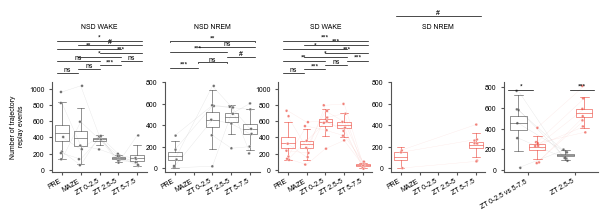

In [47]:
sessions = subjects.pf_sess()
match_ylims = True

zt_order = ["PRE", "MAZE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]

jump_thresh = 40
assert jump_thresh in [20, 40]
save_append = "" if jump_thresh == 40 else f"_jumpthresh{jump_thresh}"
prop_append = "" if jump_thresh == 40 else f"{jump_thresh}jd"
fig = subjects.SdFig().fig4(8, 6)
ax_array = []
results_list = []
for g, grp in enumerate(["NSD", "SD"]):
    for ids, st in enumerate(["WAKE", "NREM"]): # enumerate(["WAKE", "NREM"]):
    
        ax = fig.subplot(fig.gs[0, 2 * g + ids])
        ax_array.append(ax)

        # Get data for each brainstate x group combo
        boot_df = getattr(subjects.GroupData(), f"continuous_replay_{st}_number_bootstrap{save_append}")
        boot_df = boot_df[(boot_df.grp == grp)]
        replay_df = getattr(grpdata, f"continuous_replay_number{save_append}_bs")
        replay_df = replay_df[(replay_df.brainstate == st) & (replay_df.grp == grp)]
        if (grp == "SD") and (st == "NREM"):  # exlude the few tiny bits of NREM that a couple NSD rats have during the 2nd SD epoch
            replay_df = replay_df[~((replay_df.brainstate == "NREM") & (replay_df.zt == "ZT 2.5-5"))]
            boot_df = boot_df[~(boot_df.zt == "ZT 2.5-5")]
        replay_df["zt"] = pd.Categorical(replay_df["zt"], categories=zt_order)
        replay_df.sort_values(by="zt", inplace=True)
    
        palette = [subjects.colors_sd()[g]]
    
        # p1 = Plotter(data=boot_df, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"])
        p1 = Plotter(data=boot_df, x="zt", y="is_cont", ax=ax)

        p1.boxplot_sd2(palette=palette, order=zt_order)

        try:
            print(f"\n\033[4m{grp} {st} stats\033[0m:")
            results_list.append(p1.stat_anot(
                stat_within=get_bootstrap_prob_paired,
                # stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
                prepend=(grp, st),
                ))

        except:
            results_list.append(p1.stat_anot(
                stat_within=get_bootstrap_prob,
            #     stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
                prepend=(grp, st),
            ))
            pass
        
        palette_light = [subjects.colors_sd_light()[g]]
        # p2 = Plotter(data=replay_df, x="zt", y="prop", hue="grp", hue_order=["NSD", "SD"])
        p2 = Plotter(data=replay_df, x="zt", y="is_cont", ax=ax)
        p2.striplineplot_sd(palette=palette_light)
        # p2.striplineplot_sd(palette=palette_light)

        ax.set_title(f"{grp} {st}")
        ax.set_xlabel("")
        if (g == 0) & (ids == 0):
            ax.set_ylabel("Number of trajectory\n replay events")
        else:
            ax.set_ylabel("")

# Compare between groups
boot_list = []
for st in ["WAKE", "NREM"]:
    boot_df_temp = getattr(subjects.GroupData(), f"continuous_replay_{st}_number_bootstrap{save_append}")
    boot_df_temp["brainstate"] = st
    boot_list.append(boot_df_temp)
boot_df = pd.concat(boot_list)
replay_df = getattr(grpdata, f"continuous_replay_number{save_append}_bs")
df1 = get_nsd_vs_sd_df_by_state(boot_df)
df2 = get_nsd_vs_sd_df_by_state(replay_df)

ax = fig.subplot(fig.gs[0, 4])
ax_array.append(ax)
ax_array = np.array(ax_array)
palette = subjects.colors_sd(1)
palette_light = subjects.colors_sd_light(1)
print(f"\n\033[4mNSD vs SD stats\033[0m:")
p1 = Plotter(data=df1, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"], ax=ax)
results_list.append(p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    stat_across=get_bootstrap_prob,
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
    prepend=("between", st),
))
p2 = Plotter(data=df2, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"], ax=ax)
p2.striplineplot_sd(palette=palette_light)

ax.set_ylabel("")
ax.set_xlabel("")
    
fig.savefig(subjects.figpath_sd / f"replay_number_bootstrap{save_append}_brainstate", format="svg")


ylims = np.array([a.get_ylim() for a in ax_array])
# ylims_use = [np.min(ylims, axis=0)[0], np.max(ylims, axis=0)[1]]
ylims_wake, ylims_nrem = ylims[[0, 2],:].reshape(-1), ylims[[1, 3], :].reshape(-1)
ylims_wake = (np.min(ylims_wake), np.max(ylims_wake))
ylims_nrem = (np.min(ylims_nrem), np.max(ylims_nrem))
[a.set_ylim(ylims_wake) for a in ax_array[[0, 2]]];
[a.set_ylim(ylims_nrem) for a in ax_array[[1, 3]]]

fig.savefig(subjects.figpath_sd / f"replay_number_bootstrap{save_append}_brainstate_match_ylims", format="svg")

In [44]:
results_df = stats_to_df(results_list, prepend=("grp", "state"))
results_df = filter_stats_df(results_df, figure="EDF7D")
results_df.to_csv("/home/nkinsky/Documents/sleep_deprivation/ProcessedData/num_replays_by_state.csv")
results_df

,grp,state,comp1,comp2,test,pval,test_stat
0,NSD,WAKE,PRE,MAZE,"get_bootstrap_prob_paired,",3.003e-01,6.357e+01
1,NSD,WAKE,MAZE,ZT 0-2.5,"get_bootstrap_prob_paired,",4.596e-01,1.922e+01
2,NSD,WAKE,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",0.000e+00,2.352e+02
3,NSD,WAKE,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",4.750e-01,-8.490e+00
4,NSD,WAKE,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",3.160e-01,8.279e+01
10,NSD,NREM,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",0.000e+00,-3.328e+02
11,NSD,NREM,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",4.295e-01,-2.017e+01
12,NSD,NREM,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",5.900e-02,1.049e+02
16,SD,WAKE,PRE,MAZE,"get_bootstrap_prob_paired,",3.886e-01,2.528e+01
17,SD,WAKE,MAZE,ZT 0-2.5,"get_bootstrap_prob_paired,",2.000e-04,-2.732e+02


### EDF7E: Replay duration x brainstate

#Sessions = 13

NSD WAKE stats:
p-value annotation legend:
      ns: 1.00e-01 < p <= 1.00e+00
       #: 2.50e-02 < p <= 1.00e-01
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

PRE vs. MAZE: get_bootstrap_prob_paired, P_val:2.576e-01 Stat=8.115e-03
MAZE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:5.040e-02 Stat=-1.412e-02
ZT 0-2.5 vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:3.997e-01 Stat=-2.168e-03
ZT 2.5-5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:2.817e-01 Stat=-5.434e-03
PRE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:3.248e-01 Stat=-6.004e-03
MAZE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:1.285e-01 Stat=-1.629e-02
ZT 0-2.5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:1.966e-01 Stat=-7.602e-03
PRE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:2.686e-01 Stat=-8.171e-03
MAZE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:8.240e-02 Stat=-2.172e-02
PRE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:1.405e-01 Stat=-1.3

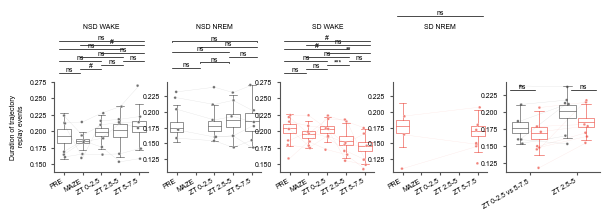

In [49]:
sessions = subjects.pf_sess()
match_ylims = True

zt_order = ["PRE", "MAZE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]

jump_thresh = 40
assert jump_thresh in [20, 40]
save_append = "" if jump_thresh == 40 else f"_jumpthresh{jump_thresh}"
prop_append = "" if jump_thresh == 40 else f"{jump_thresh}jd"
fig = subjects.SdFig().fig4(8, 6)
ax_array = []
results_list = []
for g, grp in enumerate(["NSD", "SD"]):
    for ids, st in enumerate(["WAKE", "NREM"]): # enumerate(["WAKE", "NREM"]):
    
        ax = fig.subplot(fig.gs[0, 2 * g + ids])
        ax_array.append(ax)

        # Get data for each brainstate x group combo
        boot_df = getattr(subjects.GroupData(), f"continuous_replay_{st}_PBE_duration_bootstrap{save_append}")
        boot_df = boot_df[(boot_df.grp == grp)]
        dur_df = getattr(grpdata, f"continuous_replay_PBE_duration{save_append}_bs")
        mean_df = (
            dur_df.groupby(["brainstate", "grp", "session", "zt"], sort=False)
            .mean(numeric_only=True)
            .reset_index()
        )
        mean_df = mean_df[(mean_df.brainstate == st) & (mean_df.grp == grp)]
        if (grp == "SD") and (st == "NREM"):  # exlude the few tiny bits of NREM that a couple NSD rats have during the 2nd SD epoch
            mean_df = mean_df[~((mean_df.brainstate == "NREM") & (mean_df.zt == "ZT 2.5-5"))]
            boot_df = boot_df[~(boot_df.zt == "ZT 2.5-5")]
        mean_df["zt"] = pd.Categorical(mean_df["zt"], categories=zt_order)
        mean_df.sort_values(by="zt", inplace=True)
    
        palette = [subjects.colors_sd()[g]]
    
        # p1 = Plotter(data=boot_df, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"])
        p1 = Plotter(data=boot_df, x="zt", y="pbe_duration", ax=ax)

        p1.boxplot_sd2(palette=palette, order=zt_order)

        try:
            print(f"\n\033[4m{grp} {st} stats\033[0m:")
            results_list.append(p1.stat_anot(
                stat_within=get_bootstrap_prob_paired,
                # stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
                prepend=(grp, st),
                ))

        except:
            results_list.append(p1.stat_anot(
                stat_within=get_bootstrap_prob,
            #     stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
                prepend=(grp, st),
            ))
            pass
        
        palette_light = [subjects.colors_sd_light()[g]]
        # p2 = Plotter(data=replay_df, x="zt", y="prop", hue="grp", hue_order=["NSD", "SD"])
        p2 = Plotter(data=mean_df, x="zt", y="pbe_duration", ax=ax)
        p2.striplineplot_sd(palette=palette_light)
        # p2.striplineplot_sd(palette=palette_light)

        ax.set_title(f"{grp} {st}")
        ax.set_xlabel("")
        if (g == 0) & (ids == 0):
            ax.set_ylabel("Duration of trajectory\n replay events")
        else:
            ax.set_ylabel("")

# Compare between groups
boot_list = []
for st in ["WAKE", "NREM"]:
    boot_df_temp = getattr(subjects.GroupData(), f"continuous_replay_{st}_PBE_duration_bootstrap{save_append}")
    boot_df_temp["brainstate"] = st
    boot_list.append(boot_df_temp)
boot_df = pd.concat(boot_list)
dur_df = getattr(grpdata, f"continuous_replay_PBE_duration{save_append}_bs")
mean_df = (
    dur_df.groupby(["brainstate", "grp", "session", "zt"], sort=False)
    .mean(numeric_only=True)
    .reset_index()
)
df1 = get_nsd_vs_sd_df_by_state(boot_df)
df2 = get_nsd_vs_sd_df_by_state(mean_df)

ax = fig.subplot(fig.gs[0, 4])
ax_array.append(ax)
ax_array = np.array(ax_array)
palette = subjects.colors_sd(1)
palette_light = subjects.colors_sd_light(1)
print(f"\n\033[4mNSD vs SD stats\033[0m:")
p1 = Plotter(data=df1, x="zt", y="pbe_duration", hue="grp", hue_order=["NSD", "SD"], ax=ax)
results_list.append(p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    stat_across=get_bootstrap_prob,
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
    prepend=("between", st),
))
p2 = Plotter(data=df2, x="zt", y="pbe_duration", hue="grp", hue_order=["NSD", "SD"], ax=ax)
p2.striplineplot_sd(palette=palette_light)

ax.set_ylabel("")
ax.set_xlabel("")
    
fig.savefig(subjects.figpath_sd / f"replay_pbe_duration_bootstrap{save_append}_brainstate", format="svg")


ylims = np.array([a.get_ylim() for a in ax_array])
# ylims_use = [np.min(ylims, axis=0)[0], np.max(ylims, axis=0)[1]]
ylims_wake, ylims_nrem = ylims[[0, 2],:].reshape(-1), ylims[[1, 3], :].reshape(-1)
ylims_wake = (np.min(ylims_wake), np.max(ylims_wake))
ylims_nrem = (np.min(ylims_nrem), np.max(ylims_nrem))
[a.set_ylim(ylims_wake) for a in ax_array[[0, 2]]];
[a.set_ylim(ylims_nrem) for a in ax_array[[1, 3]]]

fig.savefig(subjects.figpath_sd / f"replay_pbe_duration_bootstrap{save_append}_brainstate_match_ylims", format="svg")

In [51]:
dur_df.groupby(["brainstate", "grp"]).count()

pbe_duration     zt  session
brainstate grp                              
NREM       NSD          8291   8291     8291
           SD           1869   1869     1869
WAKE       NSD          9128   9128     9128
           SD          12940  12940    12940

In [17]:
results_df = stats_to_df(results_list, prepend=("grp", "state"))
filter_stats_df(results_df, figure="EDF7E")

,grp,state,comp1,comp2,test,pval,test_stat
0,NSD,WAKE,PRE,MAZE,"get_bootstrap_prob_paired,",2.576e-01,8.115e-03
1,NSD,WAKE,MAZE,ZT 0-2.5,"get_bootstrap_prob_paired,",5.040e-02,-1.412e-02
2,NSD,WAKE,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",3.997e-01,-2.168e-03
3,NSD,WAKE,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",2.817e-01,-5.434e-03
4,NSD,WAKE,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",3.248e-01,-6.004e-03
10,NSD,NREM,PRE,ZT 0-2.5,"get_bootstrap_prob_paired,",4.436e-01,7.249e-04
11,NSD,NREM,ZT 0-2.5,ZT 2.5-5,"get_bootstrap_prob_paired,",1.867e-01,-8.777e-03
12,NSD,NREM,ZT 2.5-5,ZT 5-7.5,"get_bootstrap_prob_paired,",4.733e-01,1.628e-03
16,SD,WAKE,PRE,MAZE,"get_bootstrap_prob_paired,",1.457e-01,8.224e-03
17,SD,WAKE,MAZE,ZT 0-2.5,"get_bootstrap_prob_paired,",2.295e-01,-7.420e-03


### Candidate event number x brainstate (NOT USED)

#Sessions = 13

NSD WAKE stats:
p-value annotation legend:
      ns: 2.50e-02 < p <= 1.00e+00
       *: 5.00e-03 < p <= 2.50e-02
      **: 5.00e-04 < p <= 5.00e-03
     ***: p <= 5.00e-04

PRE vs. MAZE: get_bootstrap_prob_paired, P_val:2.000e-04 Stat=1.088e+03
MAZE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:2.100e-03 Stat=-7.616e+02
ZT 0-2.5 vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=9.109e+02
ZT 2.5-5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:4.847e-01 Stat=-1.215e+01
PRE vs. ZT 0-2.5: get_bootstrap_prob_paired, P_val:2.659e-01 Stat=3.268e+02
MAZE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:2.177e-01 Stat=1.493e+02
ZT 0-2.5 vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:4.700e-03 Stat=8.988e+02
PRE vs. ZT 2.5-5: get_bootstrap_prob_paired, P_val:0.000e+00 Stat=1.238e+03
MAZE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:3.015e-01 Stat=1.372e+02
PRE vs. ZT 5-7.5: get_bootstrap_prob_paired, P_val:5.700e-03 Stat=1.226e+03

NSD NREM stats:
p-value annotation

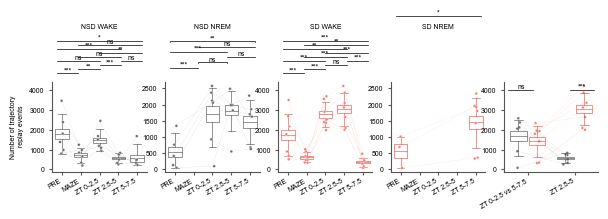

In [26]:
sessions = subjects.pf_sess()
match_ylims = True

zt_order = ["PRE", "MAZE", "ZT 0-2.5", "ZT 2.5-5", "ZT 5-7.5"]

jump_thresh = 40
assert jump_thresh in [20, 40]
save_append = "" if jump_thresh == 40 else f"_jumpthresh{jump_thresh}"
prop_append = "" if jump_thresh == 40 else f"{jump_thresh}jd"
fig = subjects.SdFig().fig4(8, 6)
ax_array = []
for g, grp in enumerate(["NSD", "SD"]):
    for ids, st in enumerate(["WAKE", "NREM"]): # enumerate(["WAKE", "NREM"]):
    
        ax = fig.subplot(fig.gs[0, 2 * g + ids])
        ax_array.append(ax)

        # Get data for each brainstate x group combo
        boot_df = getattr(subjects.GroupData(), f"candidate_replay_{st}_number_bootstrap{save_append}")
        boot_df = boot_df[(boot_df.grp == grp)]
        replay_df = getattr(grpdata, f"candidate_replay_number{save_append}_bs")
        replay_df = replay_df[(replay_df.brainstate == st) & (replay_df.grp == grp)]
        if (grp == "SD") and (st == "NREM"):  # exlude the few tiny bits of NREM that a couple NSD rats have during the 2nd SD epoch
            replay_df = replay_df[~((replay_df.brainstate == "NREM") & (replay_df.zt == "ZT 2.5-5"))]
            boot_df = boot_df[~(boot_df.zt == "ZT 2.5-5")]
        replay_df["zt"] = pd.Categorical(replay_df["zt"], categories=zt_order)
        replay_df.sort_values(by="zt", inplace=True)
    
        palette = [subjects.colors_sd()[g]]
    
        # p1 = Plotter(data=boot_df, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"])
        p1 = Plotter(data=boot_df, x="zt", y="is_cont", ax=ax)

        p1.boxplot_sd2(palette=palette, order=zt_order)

        try:
            print(f"\n\033[4m{grp} {st} stats\033[0m:")
            p1.stat_anot(
                stat_within=get_bootstrap_prob_paired,
                # stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
                )

        except:
            p1.stat_anot(
                stat_within=get_bootstrap_prob,
            #     stat_unequal=get_bootstrap_prob,
                alpha_within=[0.025, 0.005, 0.0005],
                fontsize=5,
                verbose=True,
            )
            pass
        
        palette_light = [subjects.colors_sd_light()[g]]
        # p2 = Plotter(data=replay_df, x="zt", y="prop", hue="grp", hue_order=["NSD", "SD"])
        p2 = Plotter(data=replay_df, x="zt", y="is_cont", ax=ax)
        p2.striplineplot_sd(palette=palette_light)
        # p2.striplineplot_sd(palette=palette_light)

        ax.set_title(f"{grp} {st}")
        ax.set_xlabel("")
        if (g == 0) & (ids == 0):
            ax.set_ylabel("Number of candidate\n replay events")
        else:
            ax.set_ylabel("")

# Compare between groups
boot_list = []
for st in ["WAKE", "NREM"]:
    boot_df_temp = getattr(subjects.GroupData(), f"candidate_replay_{st}_number_bootstrap{save_append}")
    boot_df_temp["brainstate"] = st
    boot_list.append(boot_df_temp)
boot_df = pd.concat(boot_list)
replay_df = getattr(grpdata, f"candidate_replay_number{save_append}_bs")
df1 = get_nsd_vs_sd_df_by_state(boot_df)
df2 = get_nsd_vs_sd_df_by_state(replay_df)

ax = fig.subplot(fig.gs[0, 4])
ax_array.append(ax)
ax_array = np.array(ax_array)
palette = subjects.colors_sd(1)
palette_light = subjects.colors_sd_light(1)
print(f"\n\033[4mNSD vs SD stats\033[0m:")
p1 = Plotter(data=df1, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"], ax=ax)
p1.boxplot_sd2(palette=palette, zorder=3).stat_anot_sd(
    stat_across=get_bootstrap_prob,
    alpha_across=[0.05, 0.01, 0.001],
    fontsize=5,
    verbose=True,
)
p2 = Plotter(data=df2, x="zt", y="is_cont", hue="grp", hue_order=["NSD", "SD"], ax=ax)
p2.striplineplot_sd(palette=palette_light)

ax.set_ylabel("")
ax.set_xlabel("")
    
fig.savefig(subjects.figpath_sd / f"replay_candidate_number_bootstrap{save_append}_brainstate", format="svg")


ylims = np.array([a.get_ylim() for a in ax_array])
# ylims_use = [np.min(ylims, axis=0)[0], np.max(ylims, axis=0)[1]]
ylims_wake, ylims_nrem = ylims[[0, 2],:].reshape(-1), ylims[[1, 3], :].reshape(-1)
ylims_wake = (np.min(ylims_wake), np.max(ylims_wake))
ylims_nrem = (np.min(ylims_nrem), np.max(ylims_nrem))
[a.set_ylim(ylims_wake) for a in ax_array[[0, 2]]];
[a.set_ylim(ylims_nrem) for a in ax_array[[1, 3]]]

fig.savefig(subjects.figpath_sd / f"replay_candidate_number_bootstrap{save_append}_brainstate_match_ylims", format="svg")